In [53]:
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime

In [55]:
sns.set_theme(style="darkgrid", context="talk")
plt.style.use("dark_background")
plt.rcParams.update({"grid.linewidth":0.45, "grid.alpha":0.5}) 

In [56]:
"""
To-Dos:

Learn about filters and find better heuristic than std dev or any other stat measure

Add comments and markdown cells to make this notebook readable

Add functions to port to python script

Create a script to automatically sort test readings from different regions using os module.

Automate this entire process.

"""

'\nTo-Dos:\n\nLearn about filters and find better heuristic than std dev or any other stat measure\n\nAdd comments and markdown cells to make this notebook readable\n\nAdd functions to port to python script\n\nCreate a script to automatically sort test readings from different regions using os module.\n\nAutomate this entire process.\n\n'

In [57]:
def set_df(df):
    df.index = pd.to_datetime(df.timestamp)
    df.drop(labels='timestamp',axis=1,inplace=True)

    for col in df:
        df[col] = df[col]-np.mean(df[col])
        df[col] = df[col]/np.std(df[col])
    return df

In [58]:


df_sensor_one = pd.read_csv(r"E:\Projects\Vibration Sensing Touch Panel\data\region1_ten_taps\SENSOR1_data.csv")
df_sensor_two = pd.read_csv(r"E:\Projects\Vibration Sensing Touch Panel\data\region1_ten_taps\SENSOR2_data.csv")


df_sensor_one = set_df(df_sensor_one)
df_sensor_two = set_df(df_sensor_two)

std_dev_one = np.std(df_sensor_one['z'])
std_dev_two = np.std(df_sensor_two['z'])

df_sensor_two['taps'] = (~((df_sensor_two['z'] <= 2*std_dev_two)&(df_sensor_two['z'] >= -2*std_dev_two))).apply(int)
df_sensor_one['taps'] = (~((df_sensor_one['z'] <= 2*std_dev_one)&(df_sensor_one['z'] >= -2*std_dev_one))).apply(int)

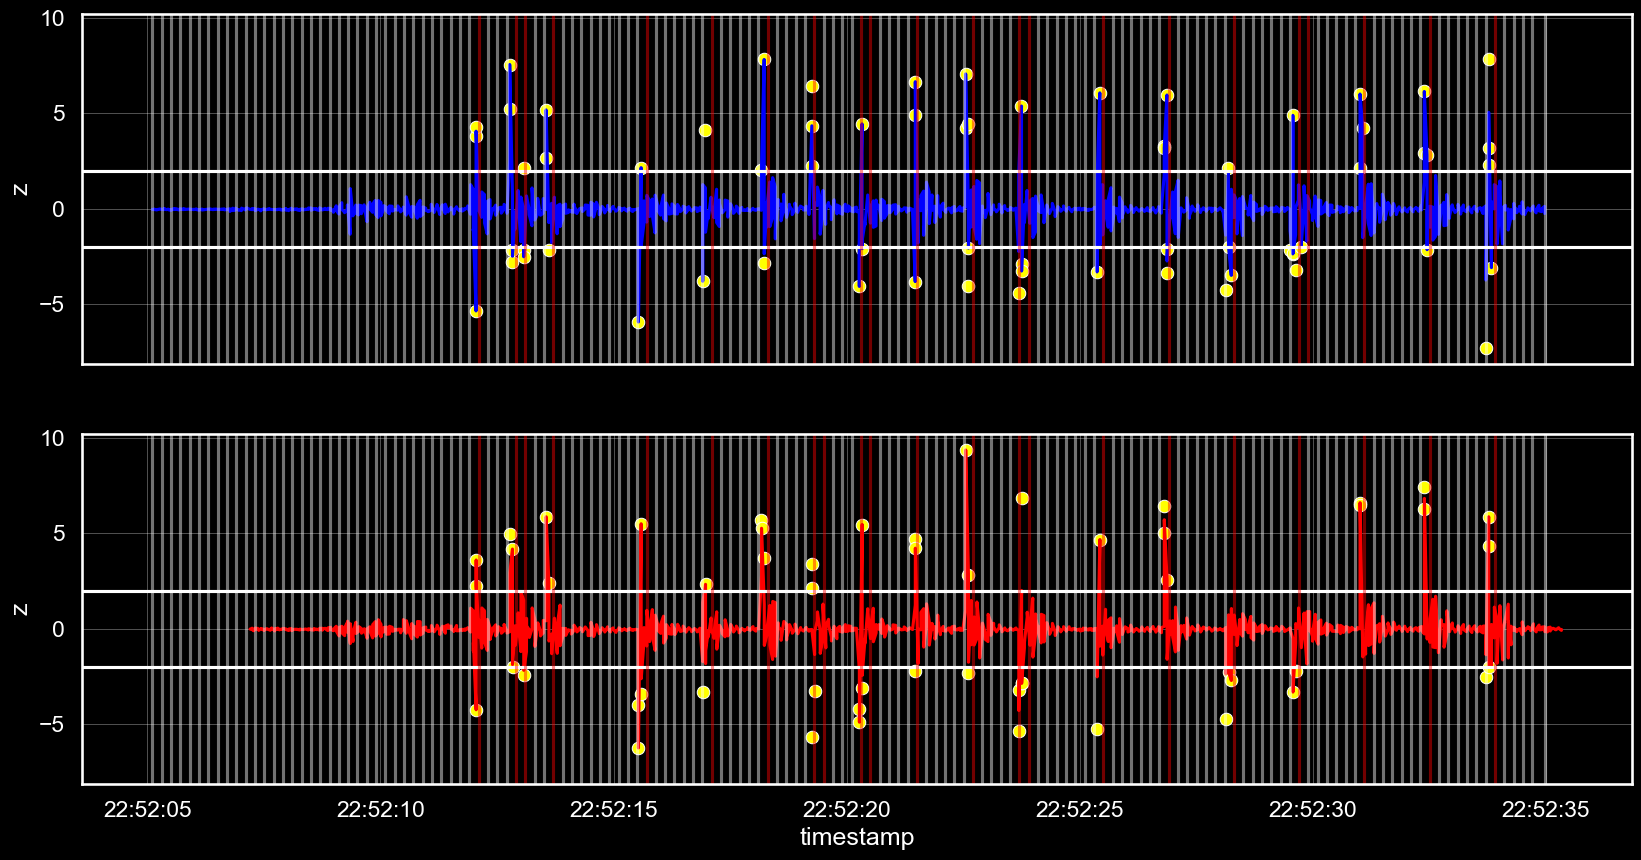

In [59]:
#checking if fixed window is the correct approach

fig,ax = plt.subplots(2,figsize = (20,10),sharex='all',sharey='all')

sns.lineplot(x = df_sensor_one.index,y = df_sensor_one['z'],errorbar=None,color="blue",ax=ax[0]) #ci none cuts down on rendering time when using seaborn!!
sns.lineplot(x = df_sensor_two.index,y = df_sensor_two['z'],errorbar=None,color="red",ax=ax[1])

ax[0].axhline(y = 2*std_dev_one)
ax[0].axhline(y = -2*std_dev_one)

ax[1].axhline(y = 2*std_dev_two)
ax[1].axhline(y = -2*std_dev_two)

df_new_two = pd.DataFrame(df_sensor_two['z'][~((df_sensor_two['z'] <= 2*std_dev_two)&(df_sensor_two['z'] >= -2*std_dev_two))])
df_new_one = pd.DataFrame(df_sensor_one['z'][~((df_sensor_one['z'] <= 2*std_dev_one)&(df_sensor_one['z'] >= -2*std_dev_one))])


sns.scatterplot(x = df_new_two.index,y = df_new_two['z'],color="yellow",ax=ax[1])
sns.scatterplot(x = df_new_one.index,y = df_new_one['z'],color="yellow",ax=ax[0])

tap_dur = 0.2

time_diff = df_sensor_one.index[-1]-df_sensor_one.index[0]
time_diff //= (datetime.timedelta(seconds=tap_dur))

ax[0].axvline(x=df_sensor_one.index[0],alpha=0.450)
ax[1].axvline(x=df_sensor_one.index[0],alpha=0.450)

last_time = df_sensor_one.index[0]

for x in range(1,time_diff):

    new_time = df_sensor_one.index[0] + datetime.timedelta(seconds=x*tap_dur)

    if(1 in df_sensor_one[last_time:new_time]['taps'].values):
        color = 'red'
    else:
        color = 'white'


    ax[0].axvline(x=new_time,alpha=0.450,color=color)
    last_time = new_time

last_time = df_sensor_one.index[0]

for x in range(1,time_diff):

    new_time = df_sensor_one.index[0] + datetime.timedelta(seconds=x*tap_dur)

    if(1 in df_sensor_two[last_time:new_time]['taps'].values):
        color = 'red'
    else:
        color = 'white'


    ax[1].axvline(x=new_time,alpha=0.450,color=color)
    last_time = new_time

ax[0].axvline(x=df_sensor_one.index[-1],alpha=0.450)
ax[1].axvline(x=df_sensor_one.index[-1],alpha=0.450)

<Axes: xlabel='z', ylabel='Count'>

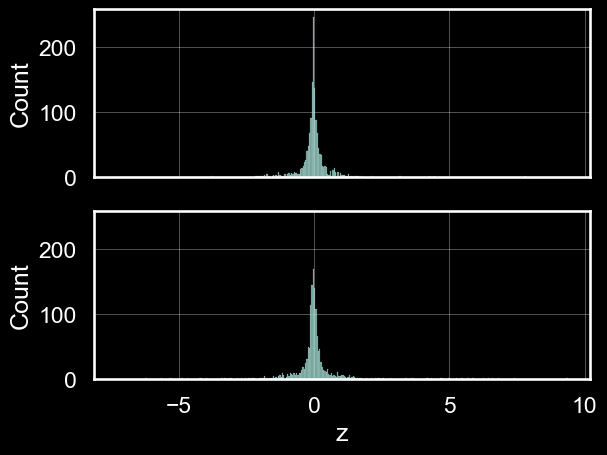

In [60]:
fig,ax = plt.subplots(2,sharex='all',sharey='all')
sns.histplot(df_sensor_one['z'],ax=ax[0])
sns.histplot(df_sensor_two['z'],ax=ax[1])

![Tap Detection Logic](/media/tap_detect.png)

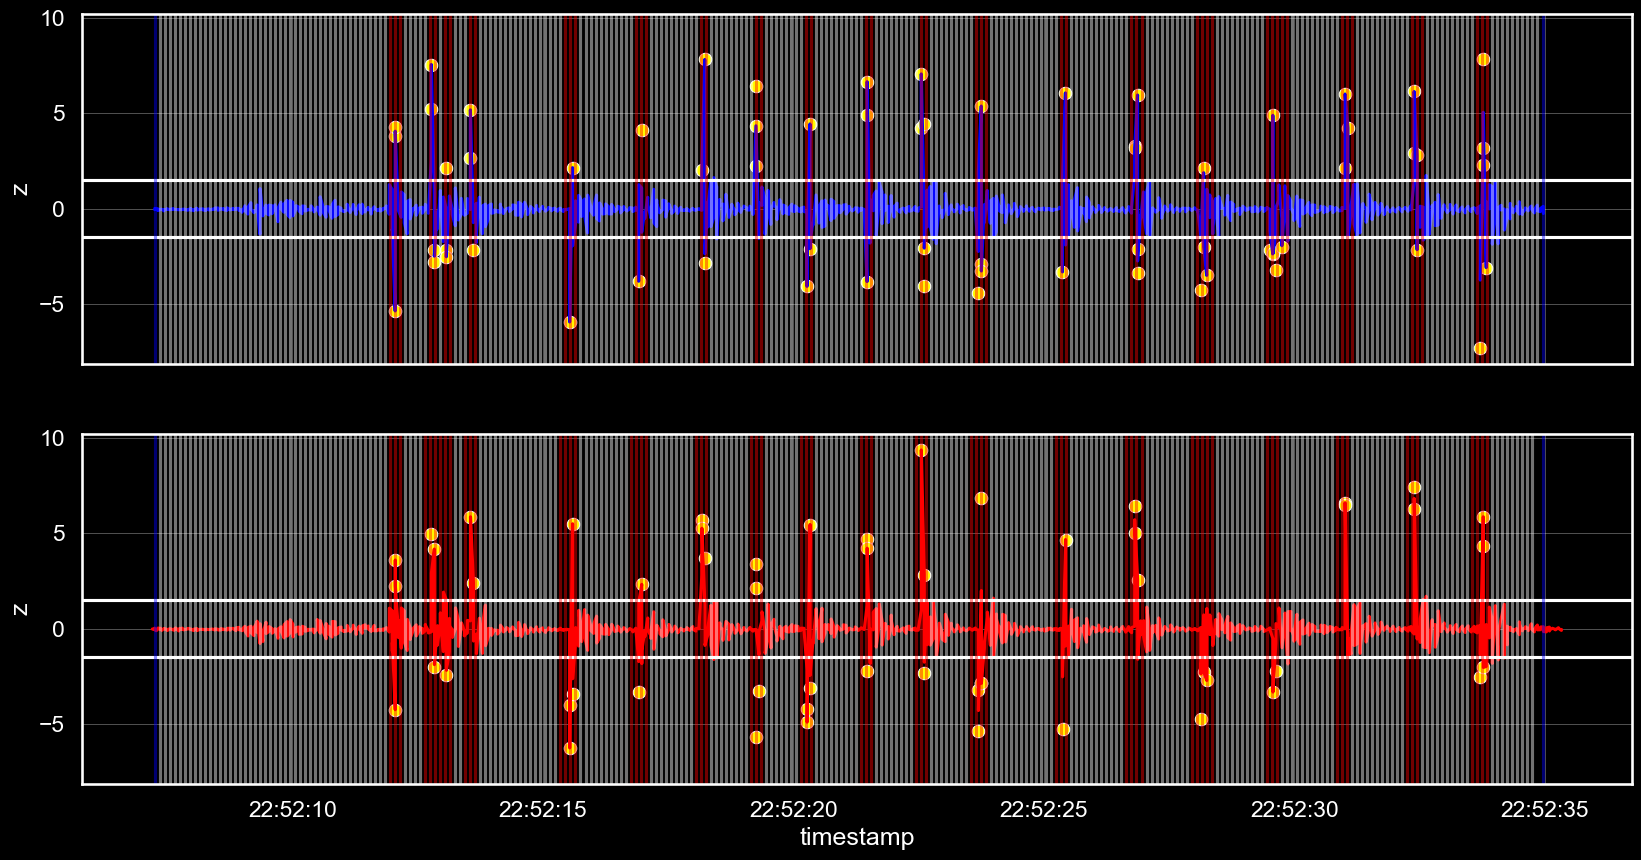

In [ ]:
#comparing sliding window approach

window_size = 0.2
stride = 0.2*0.5



recording_start = max(df_sensor_two.index[0],df_sensor_one.index[0])
recording_end = min(df_sensor_two.index[-1],df_sensor_one.index[-1])


df_sensor_one = df_sensor_one.loc[recording_start:recording_end]
df_sensor_two = df_sensor_two.loc[recording_start:recording_end]


fig,ax = plt.subplots(2,figsize = (20,10),sharex='all',sharey='all')

sns.lineplot(x = df_sensor_one.index,y = df_sensor_one['z'],errorbar=None,color="blue",ax=ax[0]) #ci none cuts down on rendering time when using seaborn!!
sns.lineplot(x = df_sensor_two.index,y = df_sensor_two['z'],errorbar=None,color="red",ax=ax[1])

ax[0].axhline(y = 1.5*std_dev_one)
ax[0].axhline(y = -1.5*std_dev_one)

ax[1].axhline(y = 1.5*std_dev_two)
ax[1].axhline(y = -1.5*std_dev_two)

df_new_two = pd.DataFrame(df_sensor_two['z'][~((df_sensor_two['z'] <= 2*std_dev_two)&(df_sensor_two['z'] >= -2*std_dev_two))])
df_new_one = pd.DataFrame(df_sensor_one['z'][~((df_sensor_one['z'] <= 2*std_dev_one)&(df_sensor_one['z'] >= -2*std_dev_one))])


sns.scatterplot(x = df_new_two.index,y = df_new_two['z'],color="yellow",ax=ax[1])
sns.scatterplot(x = df_new_one.index,y = df_new_one['z'],color="yellow",ax=ax[0])


ax[0].axvline(x=df_sensor_one.index[0],alpha=0.450,color='blue')
ax[1].axvline(x=df_sensor_one.index[0],alpha=0.450,color='blue')


old_time = df_sensor_one.index[0]
new_time = df_sensor_one.index[0]+datetime.timedelta(seconds=window_size)

sensor_one_taps = []

while new_time < df_sensor_one.index[-1]:

    window = df_sensor_one[old_time:new_time]['taps']
    if(1 in window.values):
        color = 'red'
        sensor_one_taps.append(old_time+datetime.timedelta(seconds=stride))

    else:
        color = 'white'
    
    ax[0].axvline(x=old_time+datetime.timedelta(seconds=stride),alpha=0.450,color=color)

    if(window.empty):
        break

    new_time += datetime.timedelta(seconds=stride)
    old_time += datetime.timedelta(seconds=stride)

old_time = df_sensor_one.index[0]
new_time = df_sensor_one.index[0]+datetime.timedelta(seconds=0.3)

sensor_two_taps = []

while new_time < df_sensor_one.index[-1]:

    window = df_sensor_two[old_time:new_time]['taps']

    if(1 in window.values):
        color = 'red'
        sensor_two_taps.append(old_time+datetime.timedelta(seconds=stride))

    else:
        color = 'white'
    
    ax[1].axvline(x=old_time+datetime.timedelta(seconds=stride),alpha=0.450,color=color)

    if(window.empty):
        break
    
    new_time += datetime.timedelta(seconds=stride)
    old_time += datetime.timedelta(seconds=stride)


ax[0].axvline(x=df_sensor_one.index[-1],alpha=0.450,color='blue')
ax[1].axvline(x=df_sensor_one.index[-1],alpha=0.450,color='blue')
    

In [65]:
tap_intervals_sensor_one = []
tap_intervals_sensor_two = []

last_reading = sensor_one_taps[0]

for x in range(1,len(sensor_one_taps)):
    readings_diff = sensor_one_taps[x]-sensor_one_taps[x-1]
    if(readings_diff > datetime.timedelta(seconds=stride)):
        interval = [last_reading,sensor_one_taps[x-1]]
        last_reading = sensor_one_taps[x]

        tap_intervals_sensor_one.append(interval)

tap_intervals_sensor_one.append([last_reading, sensor_one_taps[-1]])

last_reading = sensor_two_taps[0]

for x in range(1,len(sensor_two_taps)):
    readings_diff = sensor_two_taps[x]-sensor_two_taps[x-1]
    if(readings_diff > datetime.timedelta(seconds=stride)):
        interval = [last_reading,sensor_two_taps[x-1]]
        last_reading = sensor_two_taps[x]

        tap_intervals_sensor_two.append(interval)

tap_intervals_sensor_two.append([last_reading, sensor_one_taps[-1]])


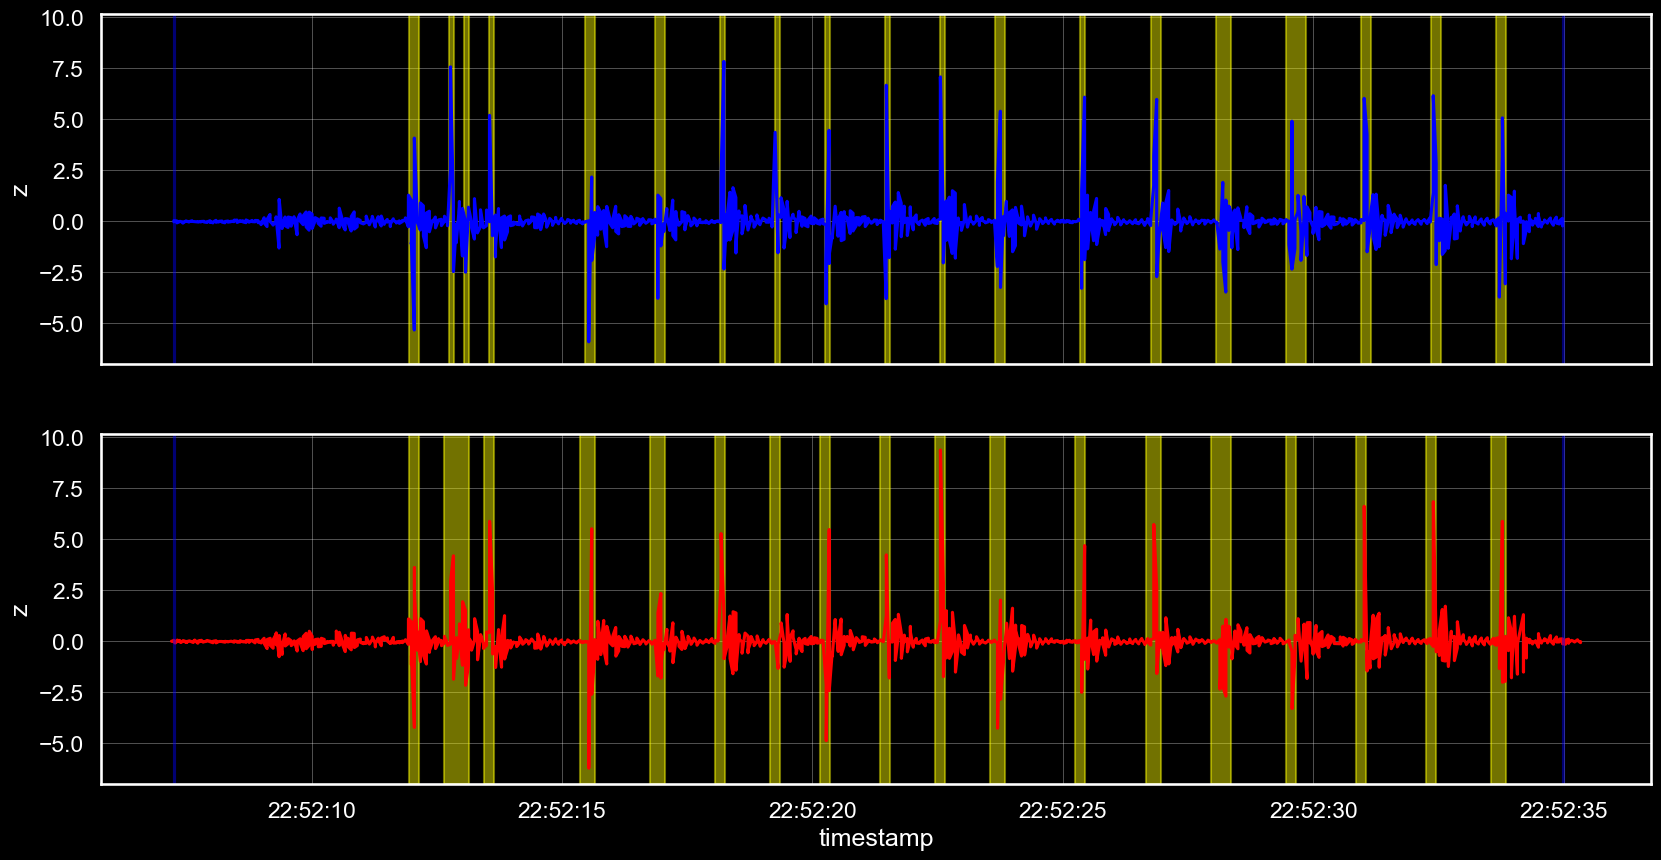

In [63]:
#plotting all intervals for tsfresh

window_size = 0.2
stride = 0.2*0.5



fig,ax = plt.subplots(2,figsize = (20,10),sharex='all',sharey='all')

sns.lineplot(x = df_sensor_one.index,y = df_sensor_one['z'],errorbar=None,color="blue",ax=ax[0]) #ci none cuts down on rendering time when using seaborn!!
sns.lineplot(x = df_sensor_two.index,y = df_sensor_two['z'],errorbar=None,color="red",ax=ax[1])


df_new_two = pd.DataFrame(df_sensor_two['z'][~((df_sensor_two['z'] <= 2*std_dev_two)&(df_sensor_two['z'] >= -2*std_dev_two))])
df_new_one = pd.DataFrame(df_sensor_one['z'][~((df_sensor_one['z'] <= 2*std_dev_one)&(df_sensor_one['z'] >= -2*std_dev_one))])


ax[0].axvline(x=df_sensor_one.index[0],alpha=0.450,color='blue')
ax[1].axvline(x=df_sensor_one.index[0],alpha=0.450,color='blue')


ax[0].axvline(x=df_sensor_one.index[-1],alpha=0.450,color='blue')
ax[1].axvline(x=df_sensor_one.index[-1],alpha=0.450,color='blue')

for interval in tap_intervals_sensor_one:
    ax[0].axvspan(interval[0],interval[1],color='yellow',alpha=0.45)

for interval in tap_intervals_sensor_two:
    ax[1].axvspan(interval[0],interval[1],color='yellow',alpha=0.45)
    

In [98]:
#to sync data, take union of all samples
#handle edge case of gaps in 

tap_window_merge_thresh = 0.5


i = 1
while i < len(tap_intervals_sensor_one):
    if(tap_intervals_sensor_one[x][0]-tap_intervals_sensor_one[x-1][0] < pd.Timedelta(seconds=tap_window_merge_thresh)):
        tap_intervals_sensor_one[x-1][1] = tap_intervals_sensor_one[x][1]
        tap_intervals_sensor_one.pop(x)
    else:
        i += 1

i = 1
while i < len(tap_intervals_sensor_two):
    if(tap_intervals_sensor_two[x][0]-tap_intervals_sensor_two[x-1][0] < pd.Timedelta(seconds=tap_window_merge_thresh)):
        tap_intervals_sensor_two[x-1][1] = tap_intervals_sensor_two[x][1]
        tap_intervals_sensor_two.pop(x)
    else:
        i += 1




new_interval = []

print(tap_intervals_sensor_one)
print(tap_intervals_sensor_two)

for x in range(len(min(tap_intervals_sensor_two,tap_intervals_sensor_one))):
    new_interval.append([max(tap_intervals_sensor_one[x][0],tap_intervals_sensor_two[x][0]),min(tap_intervals_sensor_one[x][1],tap_intervals_sensor_two[x][1])])


[[Timestamp('2025-06-13 22:52:11.951000'), Timestamp('2025-06-13 22:52:12.151000')], [Timestamp('2025-06-13 22:52:12.751000'), Timestamp('2025-06-13 22:52:13.151000')], [Timestamp('2025-06-13 22:52:13.551000'), Timestamp('2025-06-13 22:52:13.651000')], [Timestamp('2025-06-13 22:52:15.451000'), Timestamp('2025-06-13 22:52:15.651000')], [Timestamp('2025-06-13 22:52:16.851000'), Timestamp('2025-06-13 22:52:17.051000')], [Timestamp('2025-06-13 22:52:18.151000'), Timestamp('2025-06-13 22:52:18.251000')], [Timestamp('2025-06-13 22:52:19.251000'), Timestamp('2025-06-13 22:52:19.351000')], [Timestamp('2025-06-13 22:52:20.251000'), Timestamp('2025-06-13 22:52:20.351000')], [Timestamp('2025-06-13 22:52:21.451000'), Timestamp('2025-06-13 22:52:21.551000')], [Timestamp('2025-06-13 22:52:22.551000'), Timestamp('2025-06-13 22:52:22.651000')], [Timestamp('2025-06-13 22:52:23.651000'), Timestamp('2025-06-13 22:52:23.851000')], [Timestamp('2025-06-13 22:52:25.351000'), Timestamp('2025-06-13 22:52:25.45

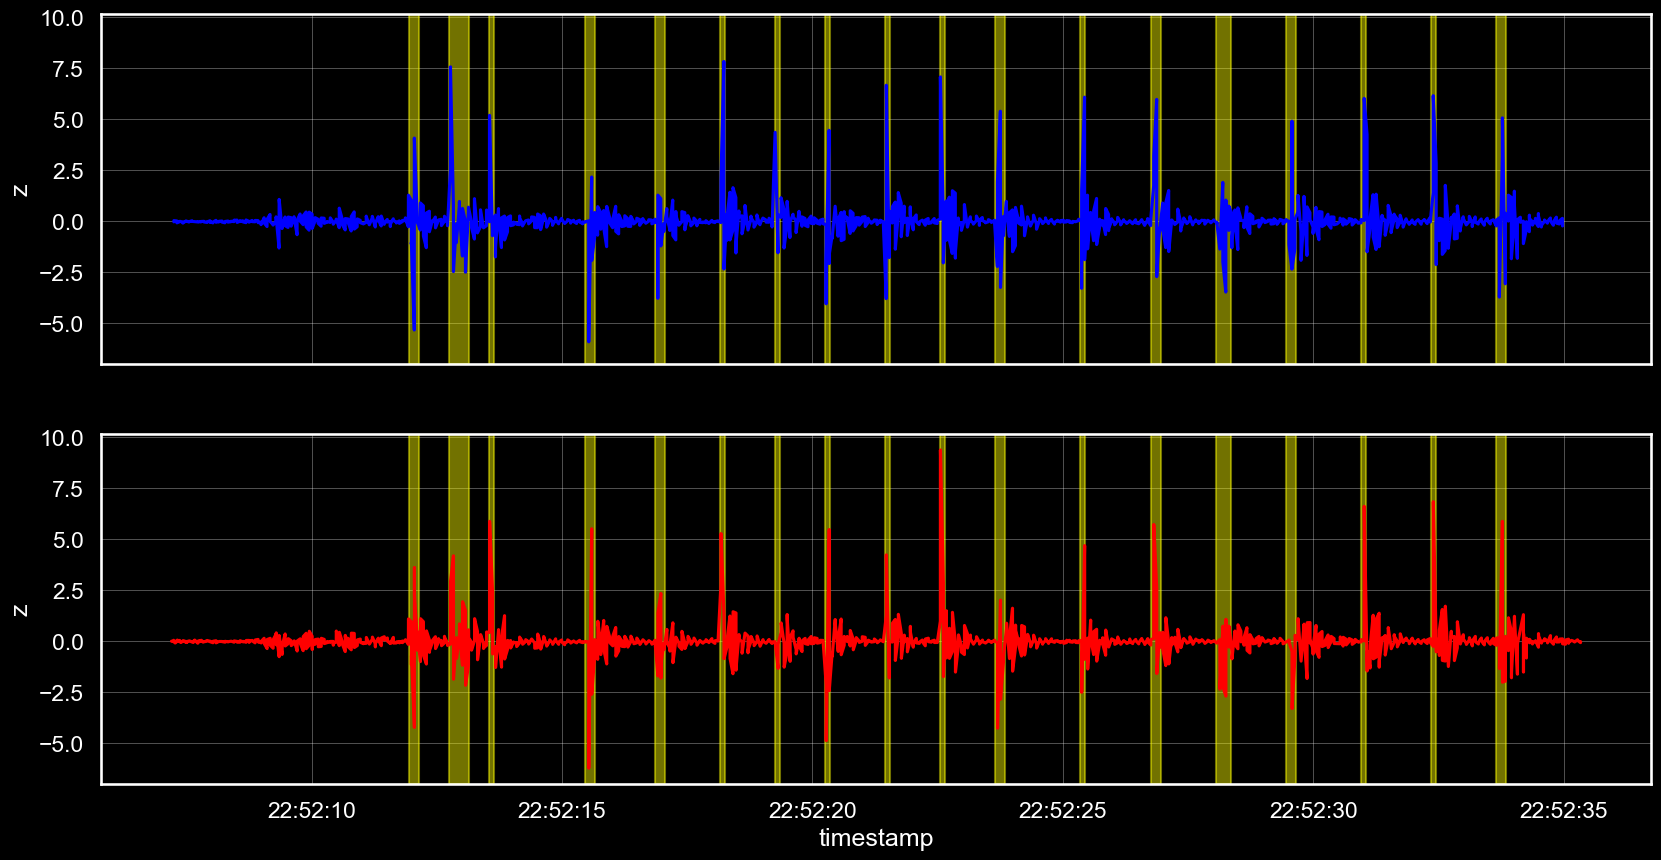

In [99]:
#plot graphs to confirm that new intervals look plausible

fig,ax = plt.subplots(2,figsize = (20,10),sharex='all',sharey='all')

sns.lineplot(x = df_sensor_one.index,y = df_sensor_one['z'],errorbar=None,color="blue",ax=ax[0]) #ci none cuts down on rendering time when using seaborn!!
sns.lineplot(x = df_sensor_two.index,y = df_sensor_two['z'],errorbar=None,color="red",ax=ax[1])


for interval in new_interval:
    ax[0].axvspan(interval[0],interval[1],color='yellow',alpha=0.45)
    ax[1].axvspan(interval[0],interval[1],color='yellow',alpha=0.45)



In [ ]:
#cleaning up the overall range of timestamps across the two channels
#not working

df_sensor_one = df_sensor_one[~df_sensor_one.index.duplicated(keep='first')]
df_sensor_two = df_sensor_two[~df_sensor_two.index.duplicated(keep='first')]


df_z_axis = pd.DataFrame(index=df_sensor_one.index.intersection(df_sensor_two.index))
df_z_axis['sensor_one'] = df_sensor_one.loc[df_z_axis.index,'z']
df_z_axis['sensor_two'] = df_sensor_two.loc[df_z_axis.index,'z']

In [101]:
#apply high pass filter
#code is from ChatGPT, using with caution

from scipy.signal import butter, filtfilt

def butter_highpass_filter(data, cutoff=0.5, fs=50, order=2):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y


def plot_fft(signal, fs, title='FFT'):
    """
    Plots the magnitude of the FFT of a signal.

    Parameters:
    - signal: 1D NumPy array or Pandas Series (your accelerometer column)
    - fs: Sampling rate in Hz
    - title: Optional title for the plot
    """
    n = len(signal)
    freq = np.fft.fftfreq(n, d=1/fs)
    fft_vals = np.fft.fft(signal)
    magnitude = np.abs(fft_vals)

    # Only show positive frequencies
    mask = freq >= 0
    plt.figure(figsize=(8, 4))
    plt.plot(freq[mask], magnitude[mask])
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


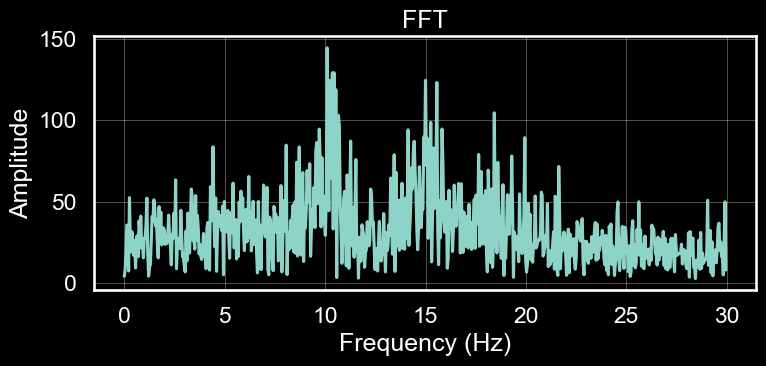

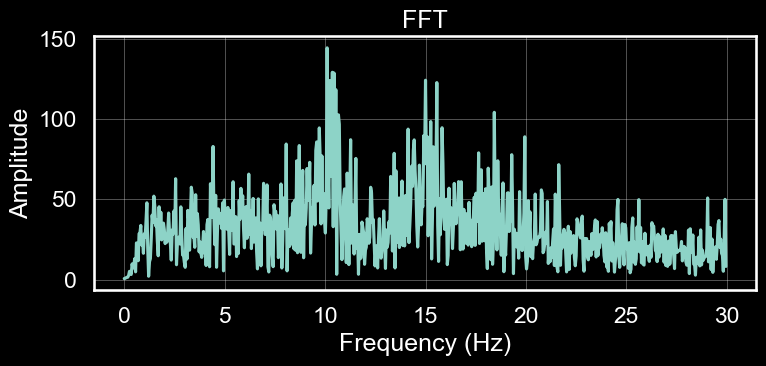

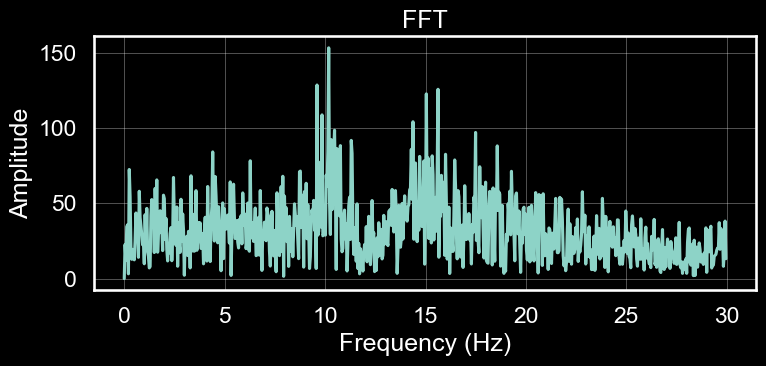

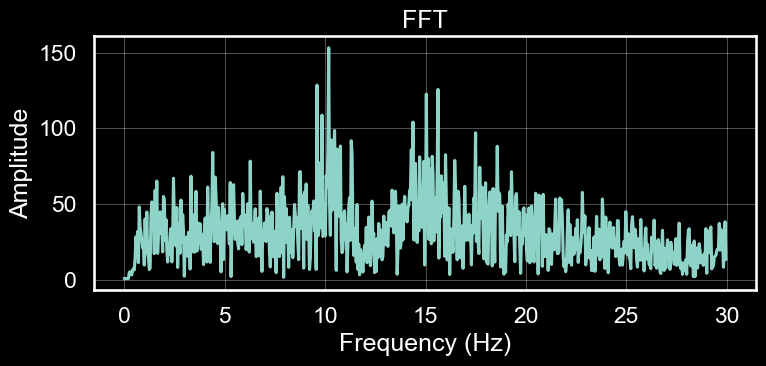

<Axes: xlabel='timestamp', ylabel='z'>

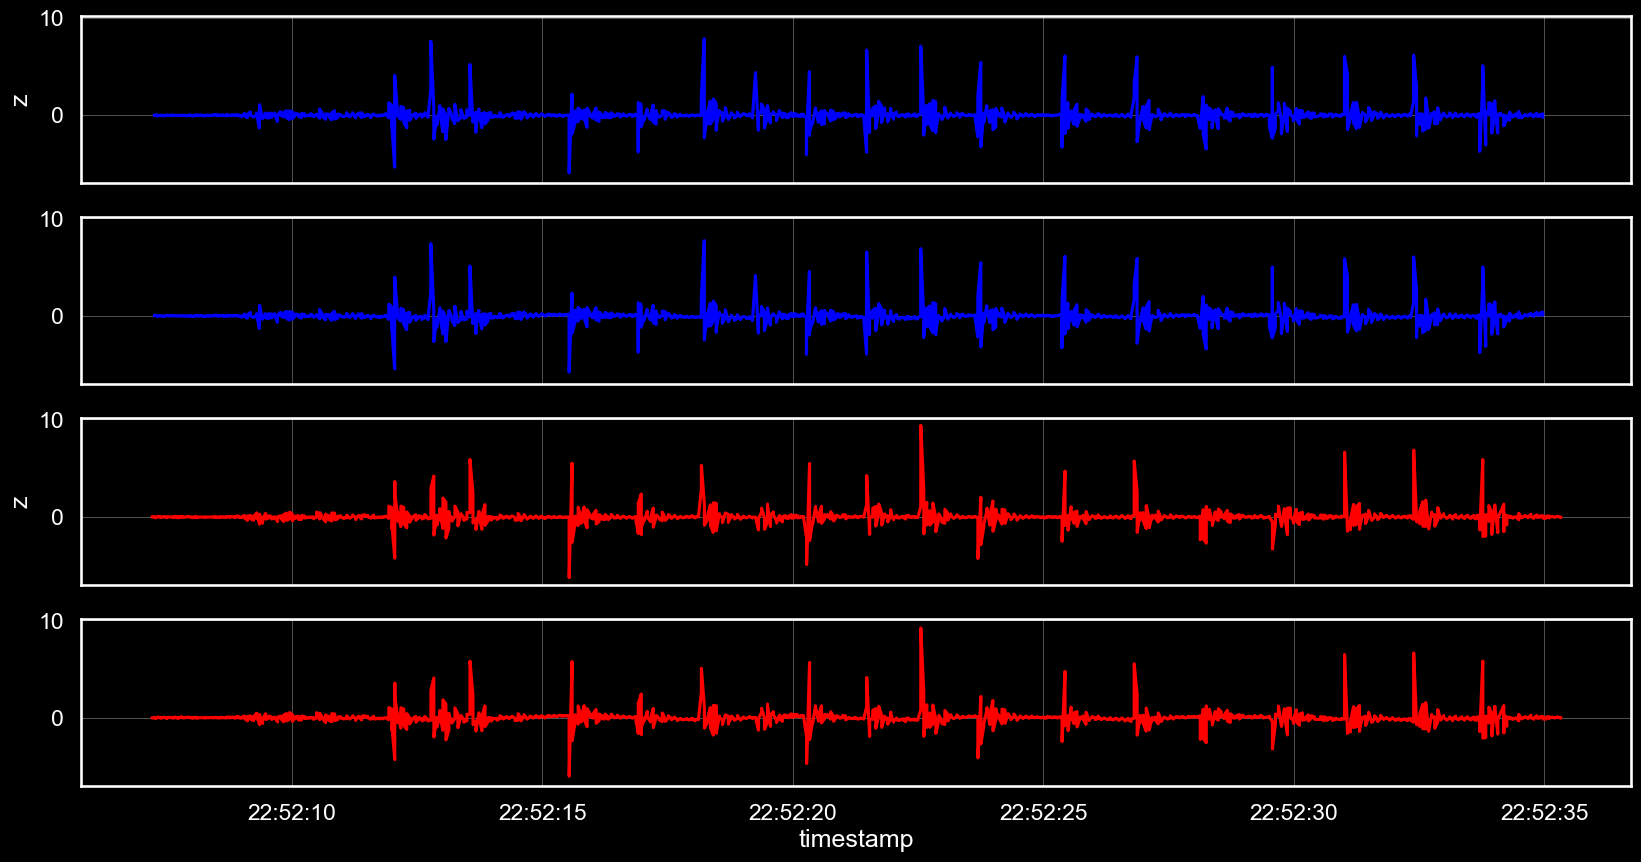

In [102]:
filtered_sensor_one = butter_highpass_filter(data=df_sensor_one['z'],cutoff=0.5,fs=60,order=2)
filtered_sensor_two = butter_highpass_filter(data=df_sensor_two['z'],cutoff=0.5,fs=60,order=2)

plot_fft(signal=df_sensor_one['z'],fs=60)
plot_fft(signal=filtered_sensor_one,fs=60)

plot_fft(signal=df_sensor_two['z'],fs=60)
plot_fft(signal=filtered_sensor_two,fs=60)



fig,ax = plt.subplots(4,figsize = (20,10),sharex='all',sharey='all')

sns.lineplot(x = df_sensor_one.index,y = filtered_sensor_one,errorbar=None,color="blue",ax=ax[1]) #ci none cuts down on rendering time when using seaborn!!
sns.lineplot(x = df_sensor_one.index,y = df_sensor_one['z'],errorbar=None,color="blue",ax=ax[0]) #ci none cuts down on rendering time when using seaborn!!

sns.lineplot(x = df_sensor_two.index,y = filtered_sensor_two,errorbar=None,color="red",ax=ax[3]) #ci none cuts down on rendering time when using seaborn!!
sns.lineplot(x = df_sensor_two.index,y = df_sensor_two['z'],errorbar=None,color="red",ax=ax[2]) #ci none cuts down on rendering time when using seaborn!!



In [103]:
#starting preprocessing for TSFEL

#TSFEL requires 100 to 70 samples for feature extraction to work reliably
window_center = []

for interval in new_interval:
    interval_len = interval[1]-interval[0]
    interval_center = interval[0]+(interval_len)//2
    window_center.append(interval_center)



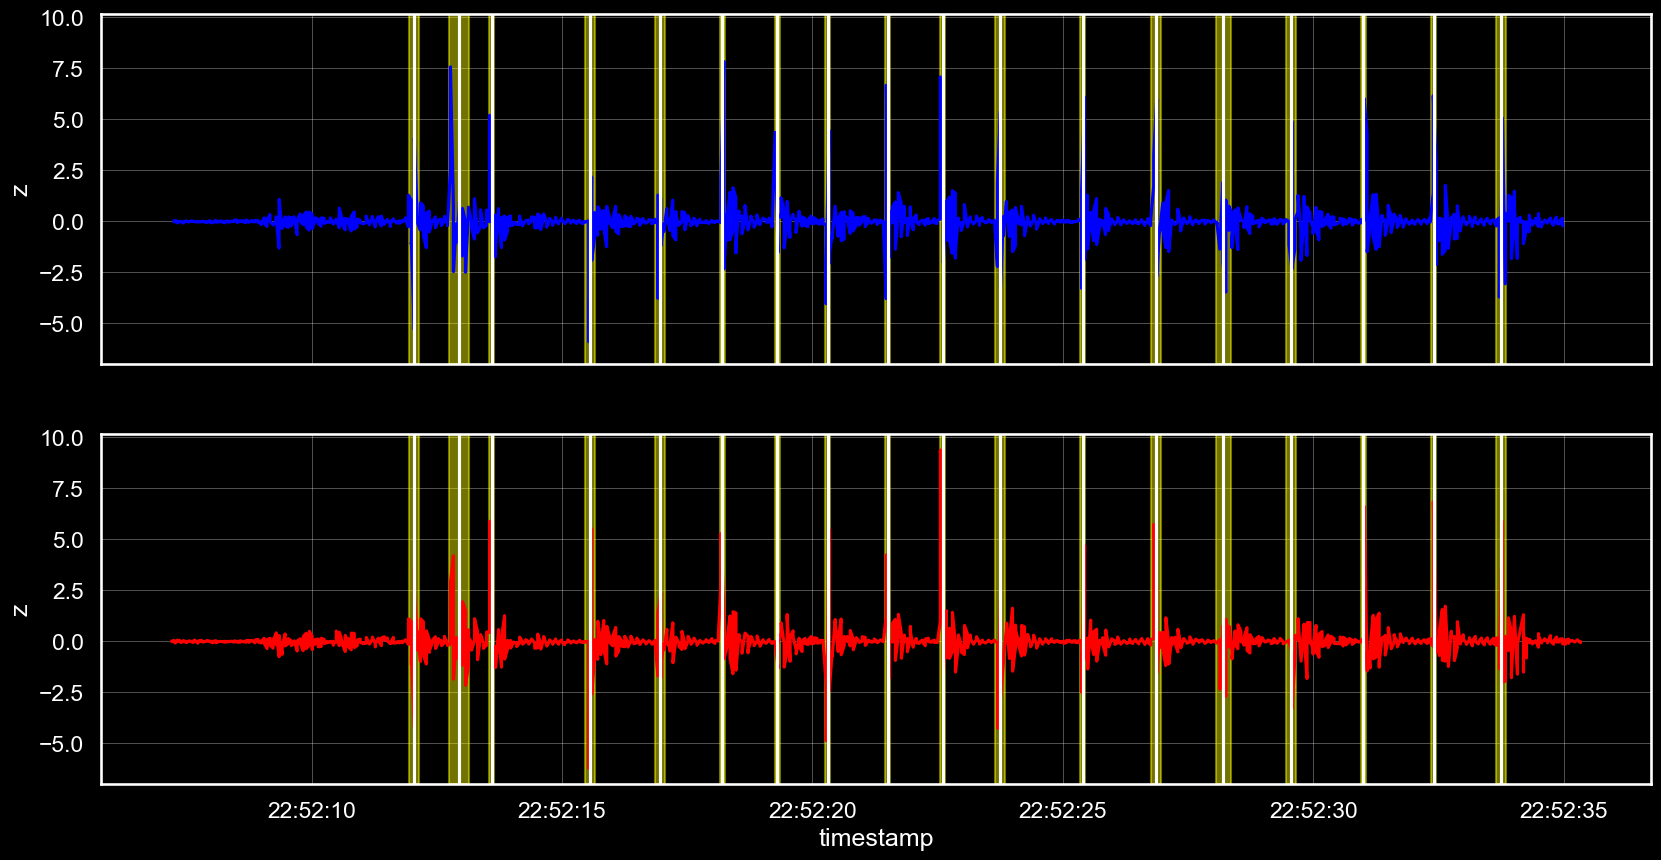

In [104]:
#plotting middle of intervals

fig,ax = plt.subplots(2,figsize = (20,10),sharex='all',sharey='all')

sns.lineplot(x = df_sensor_one.index,y = df_sensor_one['z'],errorbar=None,color="blue",ax=ax[0]) #ci none cuts down on rendering time when using seaborn!!
sns.lineplot(x = df_sensor_two.index,y = df_sensor_two['z'],errorbar=None,color="red",ax=ax[1])


for interval in new_interval:
    ax[0].axvspan(interval[0],interval[1],color='yellow',alpha=0.45)
    ax[1].axvspan(interval[0],interval[1],color='yellow',alpha=0.45)

for center in window_center:
    ax[0].axvline(center,color='white')
    ax[1].axvline(center,color='white')


In [115]:
tsfel_window_len = 100
sample_freq = 119

target_time = datetime.timedelta(seconds=tsfel_window_len/sample_freq)
tsfel_intervals = []

for center in window_center:
    interval = [(center-(target_time/2)),((target_time/2)+center)]
    tsfel_intervals.append(interval)

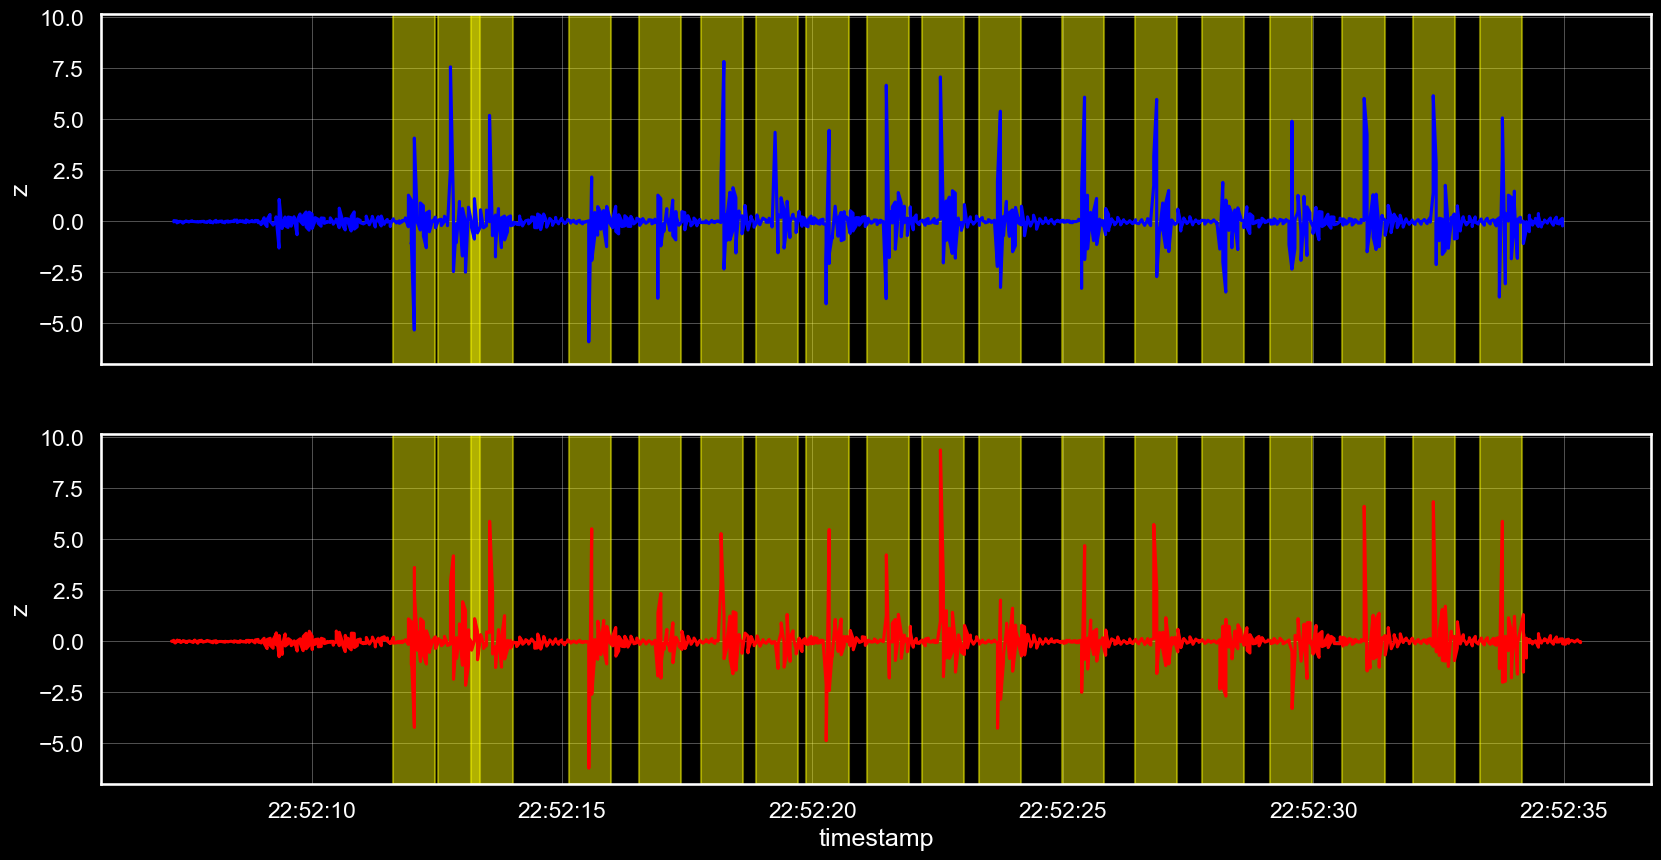

In [116]:
#plotting new windows
fig,ax = plt.subplots(2,figsize = (20,10),sharex='all',sharey='all')

sns.lineplot(x = df_sensor_one.index,y = df_sensor_one['z'],errorbar=None,color="blue",ax=ax[0]) #ci none cuts down on rendering time when using seaborn!!
sns.lineplot(x = df_sensor_two.index,y = df_sensor_two['z'],errorbar=None,color="red",ax=ax[1])


for interval in tsfel_intervals:
    ax[0].axvspan(interval[0],interval[1],color='yellow',alpha=0.45)
    ax[1].axvspan(interval[0],interval[1],color='yellow',alpha=0.45)




In [117]:
np.isnan(window_combined['sensor_one_z'].values).sum()

NameError: name 'window_combined' is not defined

In [118]:

import tsfel

# Load only temporal and statistical domains
cfg = tsfel.get_features_by_domain("statistical")


features = tsfel.time_series_features_extractor(cfg,window_combined['sensor_one_z'].values[:250], verbose=0,fs=60.0)

NameError: name 'window_combined' is not defined

In [ ]:
window_combined['sensor_one_z'].shape

(6829,)

6829


C:\Users\starm\AppData\Local\Temp\ipykernel_26900\3280323183.py:40: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg,window_combined, verbose=0)


KeyError: 'abs_energy'

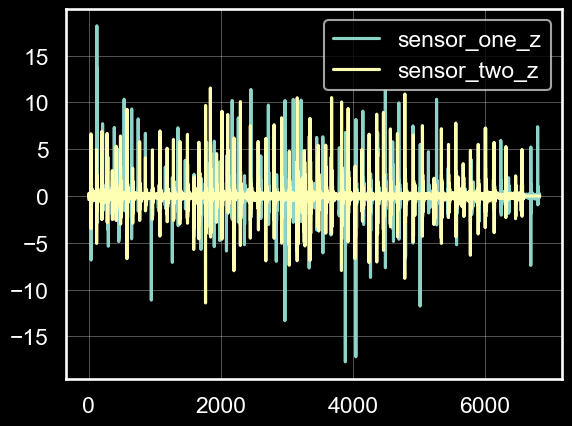

In [ ]:

import tsfel

# Load only temporal and statistical domains
cfg = tsfel.get_features_by_domain("statistical")




window_size = 2.5  # seconds
stride = window_size * 0.5

"""
fig, ax = plt.subplots(2, figsize=(20, 10), sharex='all', sharey='all')
"""
df_sensor_one = df_sensor_one.loc[tsfel_intervals[0][0]:tsfel_intervals[-1][-1]]
df_sensor_two = df_sensor_two.loc[tsfel_intervals[0][0]:tsfel_intervals[-1][-1]]

"""

sns.lineplot(x=df_sensor_one.index, y=df_sensor_one['z'], errorbar=None, color="blue", ax=ax[0])
sns.lineplot(x=df_sensor_two.index, y=df_sensor_two['z'], errorbar=None, color="red", ax=ax[1])
"""

ax[0].axvline(x=tsfel_intervals[0][0], alpha=0.450, color='blue')
ax[1].axvline(x=tsfel_intervals[0][0], alpha=0.450, color='blue')

window_features = []
window_label = []

window_combined = pd.concat([df_sensor_one['z'].reset_index(drop=True),df_sensor_two['z'].reset_index(drop=True)],axis=1)
window_combined = window_combined.fillna(0.0)

window_combined.columns = ['sensor_one_z', 'sensor_two_z']

my_list = window_combined["sensor_one_z"].tolist()
print(len(my_list))

window_combined.plot()

features = tsfel.time_series_features_extractor(cfg,window_combined, verbose=0)






""""
old_time = tsfel_intervals[0][0]
new_time = old_time + pd.Timedelta(seconds=window_size)

while new_time < tsfel_intervals[-1][-1]:

    window_sensor_one = df_sensor_one[old_time:new_time]
    window_sensor_two = df_sensor_two[old_time:new_time]
 

    if (1 in window_sensor_one['taps'].values or 1 in window_sensor_two['taps'].values):
        label = 1
        color = 'red'
    else:
        label = 0
        color = 'gray'

    window_label.append(label)

    window_combined = pd.concat([window_sensor_one['z'].reset_index(drop=True),window_sensor_two['z'].reset_index(drop=True)],axis=1)
    window_combined = window_combined.fillna(0)

    print(window_combined)


    features = tsfel.time_series_features_extractor(cfg, window_combined, verbose=0, fs=60)



    window_middle = old_time + (new_time - old_time) / 2

    ax[0].axvline(window_middle, color=color, alpha=0.5)
    ax[1].axvline(window_middle, color=color, alpha=0.5)

    old_time += pd.Timedelta(seconds=stride)
    new_time += pd.Timedelta(seconds=stride)

ax[0].axvline(x=tsfel_intervals[-1][-1], alpha=0.450, color='blue')
ax[1].axvline(x=tsfel_intervals[-1][-1], alpha=0.450, color='blue')

"""


In [ ]:
%tb

KeyError: 'spectrogram_mean_coeff'